In [ ]:
# Run when first initializing this notebook
!git clone https://github.com/JayRGopal/reg-explain.git

Cloning into 'reg-explain'...
remote: Enumerating objects: 61229, done.
remote: Counting objects: 100% (1153/1153), done.
remote: Compressing objects: 100% (1023/1023), done.
remote: Total 61229 (delta 126), reused 1153 (delta 126), pack-reused 60076
Receiving objects: 100% (61229/61229), 200.90 MiB | 19.57 MiB/s, done.
Resolving deltas: 100% (150/150), done.


In [ ]:
# This block is the equivalent of "git pull"
!rm -r reg-explain/
!git clone https://github.com/JayRGopal/reg-explain.git

Cloning into 'reg-explain'...
remote: Enumerating objects: 60132, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 60132 (delta 30), reused 36 (delta 13), pack-reused 60076
Receiving objects: 100% (60132/60132), 131.55 MiB | 35.38 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [ ]:
!python /content/reg-explain/main.py TRANSFORMER

Device:  cuda:0
Files already downloaded and verified
Files already downloaded and verified
Epoch 0: 100% 348/348 [00:28<00:00, 12.17batch/s]
Epoch 0: 2.30613720993042
Epoch 1: 100% 348/348 [00:27<00:00, 12.53batch/s]
Epoch 1: 2.302790459365845
Epoch 2: 100% 348/348 [00:28<00:00, 12.39batch/s]
Epoch 2: 2.3028395499420165
Epoch 3: 100% 348/348 [00:28<00:00, 12.22batch/s]
Epoch 3: 2.3028102922821043
Epoch 4: 100% 348/348 [00:28<00:00, 12.11batch/s]
Epoch 4: 2.302824910736084
Epoch 5:  30% 106/348 [00:08<00:20, 11.97batch/s]
Traceback (most recent call last):
  File "/content/reg-explain/main.py", line 159, in <module>
    main()
  File "/content/reg-explain/main.py", line 153, in main
    train_loss, test_loss, test_acc = run_model(device, model)
  File "/content/reg-explain/main.py", line 46, in run_model
    train_loss = train(model, training_dataloader, loss_func, optimizer, num_epochs, device)
  File "/content/reg-explain/main.py", line 80, in train
    loss.backward()
  File "/usr/l

In [ ]:
import torch
import cnn
import copy

model = cnn.SimpleCNN()

path = "/content/cnn_model_control_65.pth"
checkpoint = torch.load(path)
model.load_state_dict(checkpoint)

ModuleNotFoundError: ignored

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model.to(device).eval()

SimpleCNN(
  (conv_layer1): Conv2d(3, 16, kernel_size=(4, 4), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer2): Conv2d(16, 16, kernel_size=(4, 4), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (linear1): Linear(in_features=1600, out_features=800, bias=True)
  (linear2): Linear(in_features=800, out_features=576, bias=True)
  (linear3): Linear(in_features=576, out_features=288, bias=True)
  (linear4): Linear(in_features=288, out_features=144, bias=True)
  (linear5): Linear(in_features=144, out_features=50, bias=True)
  (linear6): Linear(in_features=50, out_features=10, bias=True)
  (linear7): Linear(in_features=10, out_features=10, bias=True)
)

In [ ]:
model.modules

<bound method Module.modules of SimpleCNN(
  (conv_layer1): Conv2d(3, 16, kernel_size=(4, 4), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer2): Conv2d(16, 16, kernel_size=(4, 4), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (linear1): Linear(in_features=1600, out_features=800, bias=True)
  (linear2): Linear(in_features=800, out_features=576, bias=True)
  (linear3): Linear(in_features=576, out_features=288, bias=True)
  (linear4): Linear(in_features=288, out_features=144, bias=True)
  (linear5): Linear(in_features=144, out_features=50, bias=True)
  (linear6): Linear(in_features=50, out_features=10, bias=True)
  (linear7): Linear(in_features=10, out_features=10, bias=True)
)>

In [ ]:
!pip install -q torch-lucent
from lucent.optvis import render

In [ ]:
import os
import torch
from torchvision.models import *
import matplotlib.pyplot as plt
from torch import nn
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(18, 10)
    plt.show()

In [ ]:
layer_3_5 = render.render_vis(model, "conv_layer4:70")
plot(layer_3_5[0][0])

NameError: ignored

## VGG19

In [ ]:
!pip install -q timm
import os
import torch
from torchvision.models import *
import matplotlib.pyplot as plt
import timm
from torch import nn
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(18, 10)
    plt.show()

     |████████████████████████████████| 431 kB 6.3 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# VGG19 - Load in PyTorch model

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model_vgg19 = timm.create_model('vgg19', pretrained=True)
model_vgg19.head.fc.weight = nn.Parameter(torch.rand(10, 4096))
model_vgg19.head.fc.bias = nn.Parameter(torch.rand(10))

path = "/content/drive/My Drive/reg_explain/vgg_control/model_best.pth.tar"
checkpoint = torch.load(path, map_location=torch.device('cpu'))
model_vgg19.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_vgg19.to(device).eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
model_vgg19.modules

<bound method Module.modules of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_

## Resnet50

In [1]:
!pip install -q timm
import os
import torch
#from torchvision.models import *
import matplotlib.pyplot as plt
import timm
from torch import nn
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(18, 10)
    plt.show()

     |████████████████████████████████| 431 kB 4.9 MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# RESNET50 - Load in PyTorch model

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model_resnet50 = timm.create_model('resnet50', pretrained=True)
model_resnet50.fc.weight = nn.Parameter(torch.rand(10, 2048))
model_resnet50.fc.bias = nn.Parameter(torch.rand(10))

path = "/content/drive/My Drive/reg_explain/resnet_control/model_best.pth.tar"
checkpoint = torch.load(path, map_location=torch.device('cpu'))
model_resnet50.load_state_dict(checkpoint['state_dict'])

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


<All keys matched successfully>

In [5]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_resnet50.to(device).eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act3): ReLU(inplace=True)
      (downsample): Sequen

##Captum

In [6]:
!pip install captum
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF

from torchvision import models

from captum.attr import IntegratedGradients
from captum.attr import Saliency
from captum.attr import DeepLift
from captum.attr import NoiseTunnel
from captum.attr import visualization as viz

     |████████████████████████████████| 1.4 MB 5.3 MB/s 


In [7]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
     transforms.Resize(224)
   
     #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
       ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=40,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=40,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


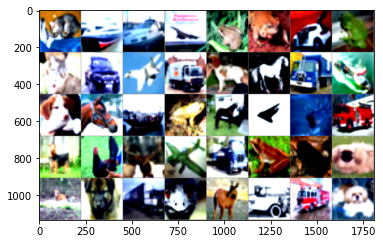

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane


In [8]:
def imshow(img, transpose = True):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# images = images.cuda()
# labels = labels.cuda()

outputs = model_resnet50(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [9]:
!pip install tqdm
import tqdm

def test(model, dataloader, device):
    """
    Computes the average accuracy of the given model on the test set.
    :param model: A PyTorch model
    :param dataloader: A dataloader that contains the testing dataset
     in the format (image, target).
    :param device: Device on which to evaluate the model, often
     torch.device('cuda:insert_num') or torch.device('cpu')
    :return: average accuracy
    """
    
    epoch_correct_sum = 0

    model.eval()
    with tqdm.tqdm(dataloader, unit="batch") as tepoch:
        for X, Y in tepoch:
            tepoch.set_description(f"Test progress")
            X, Y = X.to(device), Y.to(device)
            output = model(X)
            epoch_correct_sum += correct_predict_num(output, Y)

        avg_accuracy = epoch_correct_sum / len(dataloader.dataset)

    return avg_accuracy

def correct_predict_num(logit, target):
    """
    Returns the number of correct predictions.
    :param logit: 2D torch tensor of shape [n, class_num], where
        n is the number of samples, and class_num is the number of classes (10 for MNIST).
        Represents the output of the model.
    :param target: 1D torch tensor of shape [n],  where n is the number of samples.
        Represents the ground truth categories of images.
    :return: A python scalar. The number of correct predictions.
    """
    
    predictions = torch.argmax(logit, dim = 1)
    predictions = torch.where(predictions == target, 1, 0)
    return torch.sum(predictions).item()


In [10]:
resnet_acc = test(model_resnet50, testloader, device)
print(resnet_acc)

Test progress: 100%|██████████| 250/250 [30:42<00:00,  7.37s/batch]


0.9648


In [ ]:
vgg_acc = test(model_vgg19, testloader, device)
print(vgg_acc)

Test progress:   0%|          | 0/250 [00:00<?, ?batch/s]


RuntimeError: ignored

##Data Visualization

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

def attribute_image_features(algorithm, input, **kwargs):
    model_resnet50.zero_grad()
    tensor_attributions = algorithm.attribute(input,
                                              target=labels[ind],
                                              **kwargs
                                             )
    
    return tensor_attributions
    
class_indices = [25, 6, 0, 36, 12, 4, 13, 3, 10, 2, 1, 11]
model = model_resnet50
for ind in class_indices:
  print('Correct Class:', classes[labels[ind]])
  print('Predicted:', classes[predicted[ind]], 
      ' Probability:', torch.max(F.softmax(outputs, 1)).item())
  
  input = images[ind].unsqueeze(0)
  input.requires_grad = True
  original_image = np.transpose((images[ind].cpu().detach().numpy() / 2) + 0.5, (1, 2, 0))
  saliency = Saliency(model)
  grads = saliency.attribute(input, target=labels[ind].item())
  grads = np.transpose(grads.squeeze().cpu().detach().numpy(), (1, 2, 0))
  ig = IntegratedGradients(model)
  attr_ig, delta = attribute_image_features(ig, input, baselines=input * 0, return_convergence_delta=True)
  attr_ig = np.transpose(attr_ig.squeeze().cpu().detach().numpy(), (1, 2, 0))
  print("Approximation delta: ", abs(delta))
  ig = IntegratedGradients(model)
  nt = NoiseTunnel(ig)
  attr_ig_nt = attribute_image_features(nt, input, baselines=input * 0, nt_type='smoothgrad_sq',
                                        nt_samples=100, stdevs=0.2)
  attr_ig_nt = np.transpose(attr_ig_nt.squeeze(0).cpu().detach().numpy(), (1, 2, 0))
  dl = DeepLift(model)
  attr_dl = attribute_image_features(dl, input, baselines=input * 0)
  attr_dl = np.transpose(attr_dl.squeeze(0).cpu().detach().numpy(), (1, 2, 0))

  _ = viz.visualize_image_attr(None, original_image, 
                      method="original_image", title="Original Image")

  _ = viz.visualize_image_attr(grads, original_image, method="blended_heat_map", sign="absolute_value",
                          show_colorbar=True, title="Overlayed Gradient Magnitudes")

  _ = viz.visualize_image_attr(attr_ig, original_image, method="blended_heat_map",sign="all",
                          show_colorbar=True, title="Overlayed Integrated Gradients")

  _ = viz.visualize_image_attr(attr_ig_nt, original_image, method="blended_heat_map", sign="absolute_value", 
                             outlier_perc=10, show_colorbar=True, 
                             title="Overlayed Integrated Gradients \n with SmoothGrad Squared")

  _ = viz.visualize_image_attr(attr_dl, original_image, method="blended_heat_map",sign="all",show_colorbar=True, 
                          title="Overlayed DeepLift")

Correct Class: bird
Predicted: bird  Probability: 0.9993770718574524
Approximation delta:  tensor([0.2520], dtype=torch.float64)


##OTHER

In [8]:
ind = 0

input = images[ind].unsqueeze(0)
input.requires_grad = True

In [9]:
def attribute_image_features(algorithm, input, **kwargs):
    model_resnet50.zero_grad()
    tensor_attributions = algorithm.attribute(input,
                                              target=labels[ind],
                                              **kwargs
                                             )
    
    return tensor_attributions

In [10]:
saliency = Saliency(model_resnet50)
grads = saliency.attribute(input, target=labels[ind].item())
grads = np.transpose(grads.squeeze().cpu().detach().numpy(), (1, 2, 0))

In [11]:
ig = IntegratedGradients(model_resnet50)
attr_ig, delta = attribute_image_features(ig, input, baselines=input * 0, return_convergence_delta=True)
attr_ig = np.transpose(attr_ig.squeeze().cpu().detach().numpy(), (1, 2, 0))
print('Approximation delta: ', abs(delta))

Approximation delta:  tensor([0.0856], dtype=torch.float64)


In [ ]:
ig = IntegratedGradients(model_resnet50)
nt = NoiseTunnel(ig)
attr_ig_nt = attribute_image_features(nt, input, baselines=input * 0, nt_type='smoothgrad_sq',
                                      nt_samples=100, stdevs=0.2)
attr_ig_nt = np.transpose(attr_ig_nt.squeeze(0).cpu().detach().numpy(), (1, 2, 0))

In [ ]:
dl = DeepLift(model_resnet50)
attr_dl = attribute_image_features(dl, input, baselines=input * 0)
attr_dl = np.transpose(attr_dl.squeeze(0).cpu().detach().numpy(), (1, 2, 0))

/usr/local/lib/python3.7/dist-packages/captum/attr/_core/deep_lift.py:339: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  after the attribution is finished"""


RuntimeError: ignored

In [ ]:
from google.colab import files
!zip -r /content/images.zip /content/images
files.download(‘/content/images.zip’)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Correct Class: truck
Predicted: truck  Probability: 0.9994345307350159


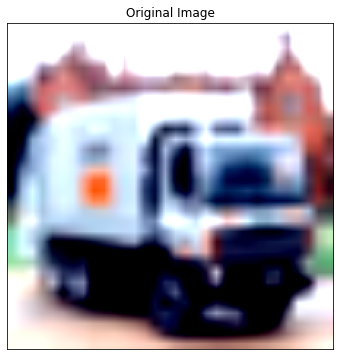

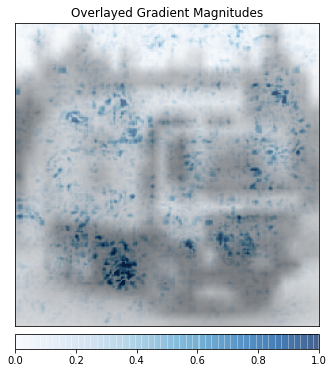

NameError: ignored

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

print('Correct Class:', classes[labels[ind]])
print('Predicted:', classes[predicted[ind]], 
      ' Probability:', torch.max(F.softmax(outputs, 1)).item())

original_image = np.transpose((images[ind].cpu().detach().numpy() / 2) + 0.5, (1, 2, 0))

_ = viz.visualize_image_attr(None, original_image, 
                      method="original_image", title="Original Image")

_ = viz.visualize_image_attr(grads, original_image, method="blended_heat_map", sign="absolute_value",
                          show_colorbar=True, title="Overlayed Gradient Magnitudes")

_ = viz.visualize_image_attr(attr_ig, original_image, method="blended_heat_map",sign="all",
                          show_colorbar=True, title="Overlayed Integrated Gradients")

_ = viz.visualize_image_attr(attr_ig_nt, original_image, method="blended_heat_map", sign="absolute_value", 
                             outlier_perc=10, show_colorbar=True, 
                             title="Overlayed Integrated Gradients \n with SmoothGrad Squared")

_ = viz.visualize_image_attr(attr_dl, original_image, method="blended_heat_map",sign="all",show_colorbar=True, 
                          title="Overlayed DeepLift")

##LUCENT


In [ ]:
!pip install -q torch-lucent
from lucent.optvis import render

     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 225 kB 53.6 MB/s 
     |████████████████████████████████| 297 kB 58.9 MB/s 
     |████████████████████████████████| 297 kB 55.7 MB/s 
     |████████████████████████████████| 297 kB 55.9 MB/s 
     |████████████████████████████████| 296 kB 76.7 MB/s 
     |████████████████████████████████| 296 kB 67.2 MB/s 
     |████████████████████████████████| 280 kB 49.5 MB/s 
     |████████████████████████████████| 280 kB 49.5 MB/s 
     |████████████████████████████████| 280 kB 76.5 MB/s 
     |████████████████████████████████| 280 kB 71.3 MB/s 
     |████████████████████████████████| 279 kB 58.7 MB/s 
     |████████████████████████████████| 279 kB 75.9 MB/s 
     |████████████████████████████████| 272 kB 68.5 MB/s 
     |████████████████████████████████| 272 kB 73.6 MB/s 
     |████████████████████████████████| 272 kB 64.9 MB/s 
     |████████████████████████████████| 270 kB 67.7 MB/s 
     |██████████

In [ ]:
model_resnet50.modules

<bound method Module.modules of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act3): ReLU(inplace=

In [ ]:
from torchvision.transforms import Normalize, Resize
def normalize():
    # ImageNet normalization for torchvision models
    # see https://pytorch.org/docs/stable/torchvision/models.html
    normal = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

    def inner(image_t):
        return torch.stack([normal(t) for t in image_t])

    return inner
def resize():
    # ImageNet resizing for torchvision models
    # see https://pytorch.org/docs/stable/torchvision/models.html
    resized = Resize(224)

    def inner(image_t):
        return torch.stack([resized(t) for t in image_t])

    return inner

100%|██████████| 512/512 [00:15<00:00, 33.44it/s]


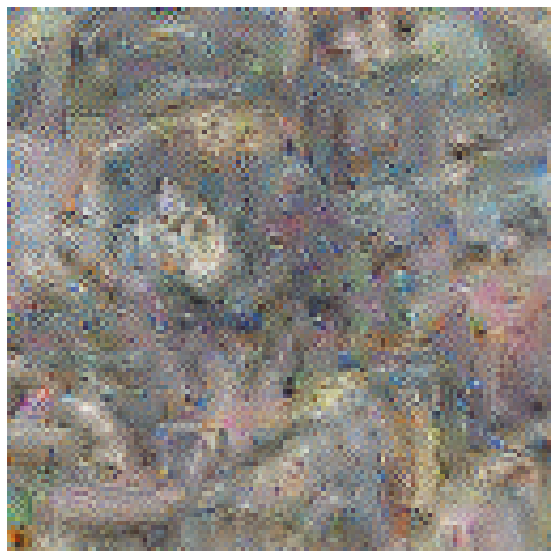

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
     transforms.Resize(224)
   
     #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
       ])
transform_basic =  [normalize(), resize()]
#param_f = lambda: param.image(224), 
layer_fc_1 = render.render_vis(model_resnet50, "fc:1", transforms = transform_basic)
plot(layer_fc_1[0][0])

In [ ]:
!python --version

Python 3.7.13


#Filter Visualization

In [ ]:
import numpy as np
def plot_filters_single_channel_big(t):
    
    #setting the rows and columns
    nrows = t.shape[0]*t.shape[2]
    ncols = t.shape[1]*t.shape[3]
    
    
    npimg = np.array(t.cpu().numpy(), np.float32)
    npimg = npimg.transpose((0, 2, 1, 3))
    npimg = npimg.ravel().reshape(nrows, ncols)
    
    npimg = npimg.T
    
    fig, ax = plt.subplots(figsize=(ncols/10, nrows/200))    
    imgplot = sns.heatmap(npimg, xticklabels=False, yticklabels=False, cmap='gray', ax=ax, cbar=False)

In [ ]:
def plot_filters_single_channel(t):
    
    #kernels depth * number of kernels
    nplots = t.shape[0]*t.shape[1]
    ncols = 12
    
    nrows = 1 + nplots//ncols
    #convert tensor to numpy image
    npimg = np.array(t.cpu().numpy(), np.float32)
    
    count = 0
    fig = plt.figure(figsize=(ncols, nrows))
    
    #looping through all the kernels in each channel
    for i in range(t.shape[0]):
        for j in range(t.shape[1]):
            count += 1
            ax1 = fig.add_subplot(nrows, ncols, count)
            npimg = np.array(t[i, j].cpu().numpy(), np.float32)
            npimg = (npimg - np.mean(npimg)) / np.std(npimg)
            npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
            ax1.imshow(npimg)
            ax1.set_title(str(i) + ',' + str(j))
            ax1.axis('off')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
   
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_filters_multi_channel(t):
    
    #get the number of kernals
    num_kernels = t.cpu().shape[0]    
    
    #define number of columns for subplots
    num_cols = 12
    #rows = num of kernels
    num_rows = num_kernels
    
    #set the figure size
    fig = plt.figure(figsize=(num_cols,num_rows))
    
    #looping through all the kernels
    for i in range(t.cpu().shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        
        #for each kernel, we convert the tensor to numpy 
        npimg = np.array(t[i].cpu().numpy(), np.float32)
        #standardize the numpy image
        npimg = (npimg - np.mean(npimg)) / np.std(npimg)
        npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
        npimg = npimg.transpose((1, 2, 0))
        ax1.imshow(npimg)
        ax1.axis('off')
        ax1.set_title(str(i))
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        
    plt.savefig('myimage.png', dpi=100)    
    plt.tight_layout()
    plt.show()

In [ ]:
import torch.nn as nn

def plot_weights(model, layer_num, single_channel = True, collated = False):
  
  #extracting the model features at the particular layer number
  layer = model_resnet50.conv1
  
  #checking whether the layer is convolution layer or not 
  if isinstance(layer, nn.Conv2d):
    #getting the weight tensor data
    weight_tensor = model_resnet50.conv1.weight.data
    
    if single_channel:
      if collated:
        plot_filters_single_channel_big(weight_tensor)
      else:
        plot_filters_single_channel(weight_tensor)
        
    else:
      if weight_tensor.shape[1] == 3:
        plot_filters_multi_channel(weight_tensor)
      else:
        print("Can only plot weights with three channels with single channel = False")
        
  else:
    print("Can only visualize layers which are convolutional")

In [ ]:
model_resnet50.modules

<bound method Module.modules of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act3): ReLU(inplace=

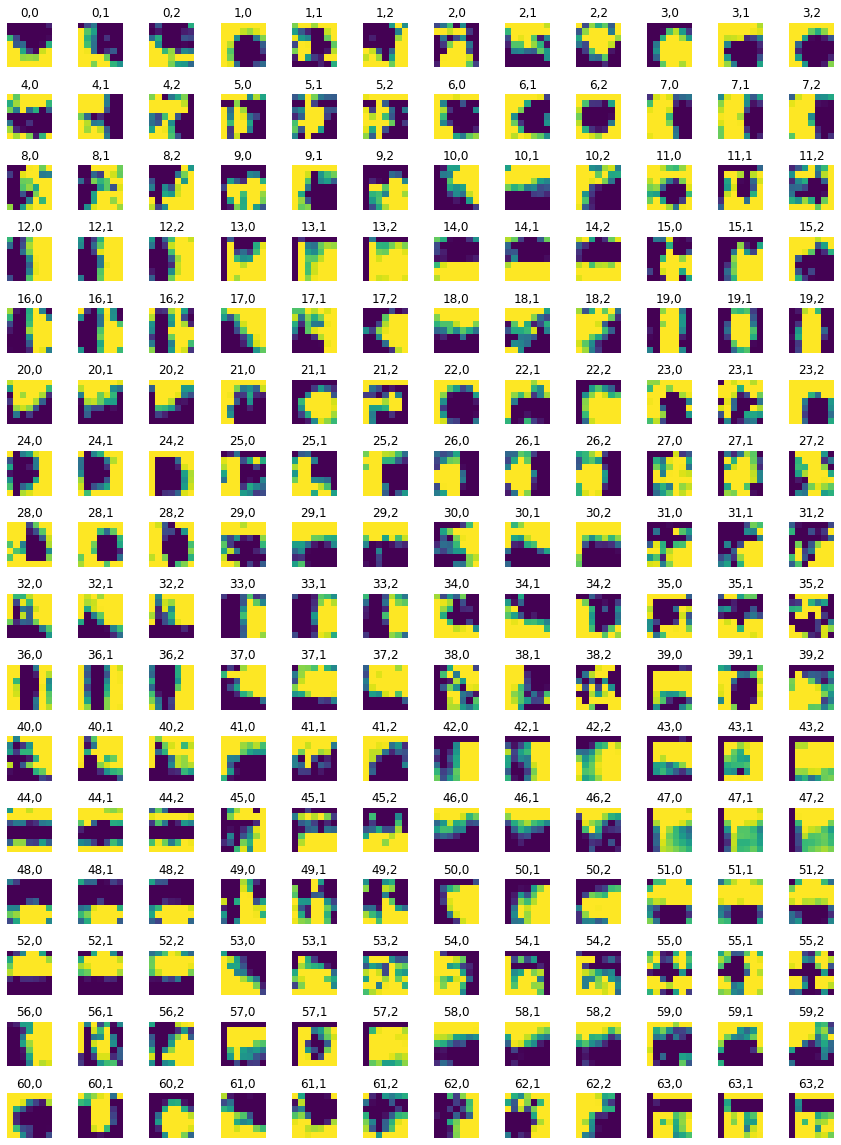

In [ ]:
plot_weights(model_resnet50, 0, single_channel = True)